In [2]:
from keras_preprocessing.image import ImageDataGenerator

image_size = 256
batch_size = 4

datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    fill_mode="nearest"
)

train = datagen.flow_from_directory(
    "Tomato_Dataset\\train",
    subset="training",
    seed=123,
    target_size=(image_size,image_size),
    batch_size=batch_size,
    class_mode="categorical"
)

val = datagen.flow_from_directory(
    "Tomato_Dataset\\train",
    target_size=(image_size,image_size),
    seed=123,
    batch_size=batch_size,
    subset="validation"
)

test_datagen = ImageDataGenerator(rescale=1./255)

test = test_datagen.flow_from_directory(
    "Tomato_Dataset\\val",
    target_size=(image_size,image_size),
    batch_size=batch_size,
    class_mode='categorical'
)

Found 8000 images belonging to 10 classes.
Found 2000 images belonging to 10 classes.
Found 1000 images belonging to 10 classes.


In [3]:
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout,BatchNormalization

def Model():
    cham_dim=-1
    model = Sequential()
    model.add(Conv2D(128,(3,3),activation="relu",input_shape=(image_size,image_size,3),padding="same"))
    model.add(MaxPooling2D(3,3))
    model.add(BatchNormalization(axis=cham_dim))
    model.add(Dropout(0.25))
    model.add(Conv2D(128, (3, 3),activation="relu",padding="same"))
    model.add(BatchNormalization(axis=cham_dim))
    model.add(Conv2D(128, (3, 3),activation="relu",padding="same"))
    model.add(BatchNormalization(axis=cham_dim))
    model.add(MaxPooling2D(2, 2))
    model.add(Dropout(0.25))
    model.add(Conv2D(128, (3, 3),activation="relu",padding="same"))
    model.add(BatchNormalization(axis=cham_dim))
    model.add(Conv2D(128, (3, 3),activation="relu",padding="same"))
    model.add(BatchNormalization(axis=cham_dim))
    model.add(MaxPooling2D(3,3))
    model.add(Dropout(0.5))
    model.add(Flatten())
    model.add(Dense(512,activation="relu"))
    model.add(BatchNormalization(axis=cham_dim))
    model.add(Dropout(0.5))
    model.add(Dense(10,activation="softmax"))

    model.summary()

    return model

In [4]:
model12 = Model()
model12.compile(optimizer="RMSProp",loss="categorical_crossentropy",metrics=["acc"])
history = model12.fit_generator(
    train,
    steps_per_epoch=2000,
    epochs=12,
    validation_data=val,
    validation_steps=500
)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 128)     3584      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 85, 85, 128)      0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 85, 85, 128)      512       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 85, 85, 128)       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 85, 85, 128)       147584    
                                                                 
 batch_normalization_1 (Batc  (None, 85, 85, 128)      5

<ipython-input-4-92c517c78e4f>:4: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model12.fit_generator(


Epoch 1/12
2000/2000 [==============================] - 158s 75ms/step - loss: 2.0738 - acc: 0.3689 - val_loss: 1.4655 - val_acc: 0.5080
Epoch 2/12
2000/2000 [==============================] - 146s 73ms/step - loss: 1.4844 - acc: 0.5019 - val_loss: 2.0304 - val_acc: 0.4325
Epoch 3/12
2000/2000 [==============================] - 146s 73ms/step - loss: 1.3025 - acc: 0.5701 - val_loss: 4.3857 - val_acc: 0.2720
Epoch 4/12
2000/2000 [==============================] - 146s 73ms/step - loss: 1.1532 - acc: 0.6214 - val_loss: 1.9378 - val_acc: 0.5980
Epoch 5/12
2000/2000 [==============================] - 150s 75ms/step - loss: 1.0681 - acc: 0.6569 - val_loss: 5.1329 - val_acc: 0.2775
Epoch 6/12
2000/2000 [==============================] - 147s 73ms/step - loss: 0.9624 - acc: 0.6860 - val_loss: 1.2359 - val_acc: 0.7745
Epoch 7/12
2000/2000 [==============================] - 147s 73ms/step - loss: 0.9454 - acc: 0.6933 - val_loss: 1.4051 - val_acc: 0.6055
Epoch 8/12
2000/2000 [===================

In [5]:
model50 = Model()
model50.compile(optimizer="RMSProp",loss="categorical_crossentropy",metrics=["acc"])
model50.fit_generator(
    train,
    steps_per_epoch=2000,
    epochs=50,
    validation_data=val,
    validation_steps=500
)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 256, 256, 128)     3584      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 85, 85, 128)      0         
 2D)                                                             
                                                                 
 batch_normalization_6 (Batc  (None, 85, 85, 128)      512       
 hNormalization)                                                 
                                                                 
 dropout_4 (Dropout)         (None, 85, 85, 128)       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 85, 85, 128)       147584    
                                                                 
 batch_normalization_7 (Batc  (None, 85, 85, 128)     

<ipython-input-5-3776364ceffc>:4: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model50.fit_generator(


2000/2000 [==============================] - 149s 74ms/step - loss: 1.8875 - acc: 0.4164 - val_loss: 3.5772 - val_acc: 0.3625
Epoch 2/50
2000/2000 [==============================] - 147s 73ms/step - loss: 1.2758 - acc: 0.5817 - val_loss: 1.4824 - val_acc: 0.6310
Epoch 3/50
2000/2000 [==============================] - 146s 73ms/step - loss: 1.1288 - acc: 0.6289 - val_loss: 2.8960 - val_acc: 0.4530
Epoch 4/50
2000/2000 [==============================] - 147s 74ms/step - loss: 1.0468 - acc: 0.6594 - val_loss: 3.6136 - val_acc: 0.4455
Epoch 5/50
2000/2000 [==============================] - 146s 73ms/step - loss: 0.9870 - acc: 0.6776 - val_loss: 6.0850 - val_acc: 0.3190
Epoch 6/50
2000/2000 [==============================] - 147s 73ms/step - loss: 0.9016 - acc: 0.7150 - val_loss: 3.8766 - val_acc: 0.5140
Epoch 7/50
2000/2000 [==============================] - 146s 73ms/step - loss: 0.8506 - acc: 0.7184 - val_loss: 0.7415 - val_acc: 0.7860
Epoch 8/50
2000/2000 [==============================

In [9]:
import numpy as np
from sklearn.metrics import confusion_matrix
Y_pred = model12.predict_generator(test,250)
y_pred = np.argmax(Y_pred,axis=1)
len(y_pred) 

<ipython-input-9-6739ee69039c>:4: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  Y_pred = model12.predict_generator(test,250)


1000

In [10]:
ytrue=np.array(np.array(test.labels))
ypred=np.array(y_pred)
cm=confusion_matrix(ytrue,ypred)

In [11]:
cm


array([[12, 17,  9,  5,  0, 22,  8, 14,  4,  9],
       [14, 14,  9,  6,  2, 20,  5, 16,  3, 11],
       [13, 17, 11,  5,  2, 20,  5, 16,  7,  4],
       [13, 14, 15,  9,  3, 19,  2, 12,  3, 10],
       [ 9, 22, 12, 14,  2, 15,  5,  8,  4,  9],
       [ 6, 19, 14,  9,  1, 15,  5, 17,  4, 10],
       [ 8, 13, 13,  9,  1, 19,  3, 15,  6, 13],
       [15, 12,  9,  8,  5, 19,  2, 15,  3, 12],
       [13, 18, 12, 10,  2, 15,  2,  9,  6, 13],
       [15, 10, 14, 10,  3, 14,  5, 14,  4, 11]], dtype=int64)

In [13]:
from sklearn.metrics import classification_report
clr = classification_report(ytrue, ypred, target_names=list(test.class_indices.keys()), digits= 4) # create classification report
print("Classification Report:\n----------------------\n", clr)

Classification Report:
----------------------
                                                precision    recall  f1-score   support

                      Tomato___Bacterial_spot     0.1017    0.1200    0.1101       100
                        Tomato___Early_blight     0.0897    0.1400    0.1094       100
                         Tomato___Late_blight     0.0932    0.1100    0.1009       100
                           Tomato___Leaf_Mold     0.1059    0.0900    0.0973       100
                  Tomato___Septoria_leaf_spot     0.0952    0.0200    0.0331       100
Tomato___Spider_mites Two-spotted_spider_mite     0.0843    0.1500    0.1079       100
                         Tomato___Target_Spot     0.0714    0.0300    0.0423       100
       Tomato___Tomato_Yellow_Leaf_Curl_Virus     0.1103    0.1500    0.1271       100
                 Tomato___Tomato_mosaic_virus     0.1364    0.0600    0.0833       100
                             Tomato___healthy     0.1078    0.1100    0.1089      

In [12]:
import numpy as np
from sklearn.metrics import confusion_matrix
Y_pred = model50.predict_generator(test,250)
y_pred = np.argmax(Y_pred,axis=1)
len(y_pred) 

<ipython-input-12-413dbe99bec5>:4: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  Y_pred = model50.predict_generator(test,250)


1000

In [14]:
ytrue=np.array(np.array(test.labels))
ypred=np.array(y_pred)
cm=confusion_matrix(ytrue,ypred)

In [15]:
cm


array([[17,  7,  8,  6,  7, 12, 12, 10, 13,  8],
       [ 9,  6, 11, 11, 10, 12,  7,  9, 13, 12],
       [10,  7, 12, 10, 10,  8,  8, 13, 10, 12],
       [ 7,  9, 10, 13, 10, 12,  9, 14,  7,  9],
       [ 9, 14,  8, 12, 11, 14,  5,  7, 11,  9],
       [12, 11, 10, 11,  9,  8,  8,  9, 11, 11],
       [16, 11,  6,  8,  7, 15,  6,  7,  9, 15],
       [13,  9, 14,  7, 10, 10, 12, 12,  9,  4],
       [ 9,  4, 10, 13, 14,  7, 13,  7, 10, 13],
       [ 8, 16, 12,  7, 15,  6, 14,  9,  6,  7]], dtype=int64)

In [16]:
from sklearn.metrics import classification_report
clr = classification_report(ytrue, ypred, target_names=list(test.class_indices.keys()), digits= 4) # create classification report
print("Classification Report:\n----------------------\n", clr)

Classification Report:
----------------------
                                                precision    recall  f1-score   support

                      Tomato___Bacterial_spot     0.1545    0.1700    0.1619       100
                        Tomato___Early_blight     0.0638    0.0600    0.0619       100
                         Tomato___Late_blight     0.1188    0.1200    0.1194       100
                           Tomato___Leaf_Mold     0.1327    0.1300    0.1313       100
                  Tomato___Septoria_leaf_spot     0.1068    0.1100    0.1084       100
Tomato___Spider_mites Two-spotted_spider_mite     0.0769    0.0800    0.0784       100
                         Tomato___Target_Spot     0.0638    0.0600    0.0619       100
       Tomato___Tomato_Yellow_Leaf_Curl_Virus     0.1237    0.1200    0.1218       100
                 Tomato___Tomato_mosaic_virus     0.1010    0.1000    0.1005       100
                             Tomato___healthy     0.0700    0.0700    0.0700      

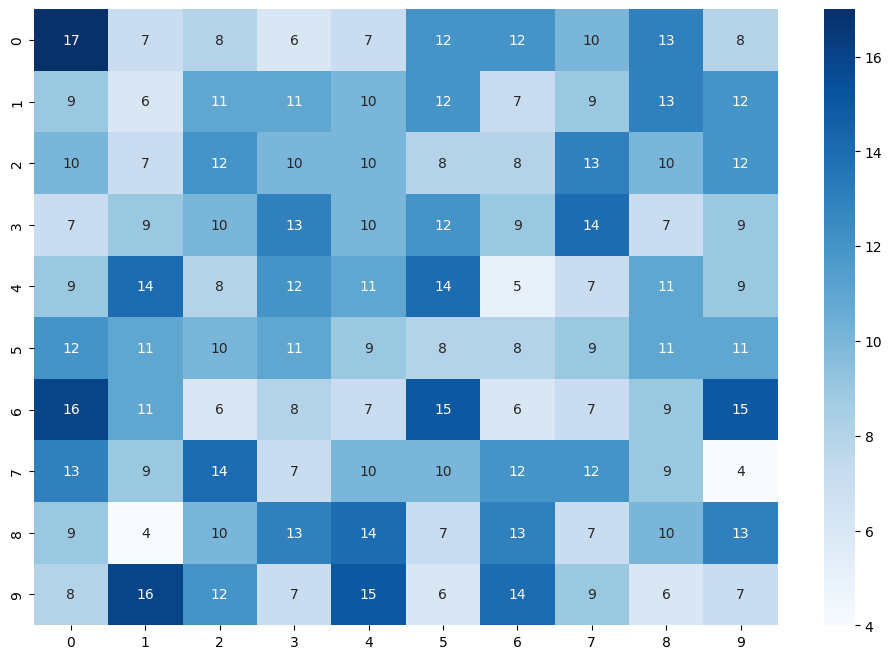

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12,8))
sns.heatmap(cm,cmap="Blues", annot=True)
plt.show()

In [22]:
import numpy as np
from sklearn.metrics import confusion_matrix
Y_pred = model50.predict_generator(val,500)
y_pred = np.argmax(Y_pred,axis=1)
len(y_pred) 

<ipython-input-22-3145ad0ff946>:4: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  Y_pred = model50.predict_generator(val,500)


2000

In [23]:
ytrue=np.array(np.array(val.labels))
ypred=np.array(y_pred)
cm=confusion_matrix(ytrue,ypred)

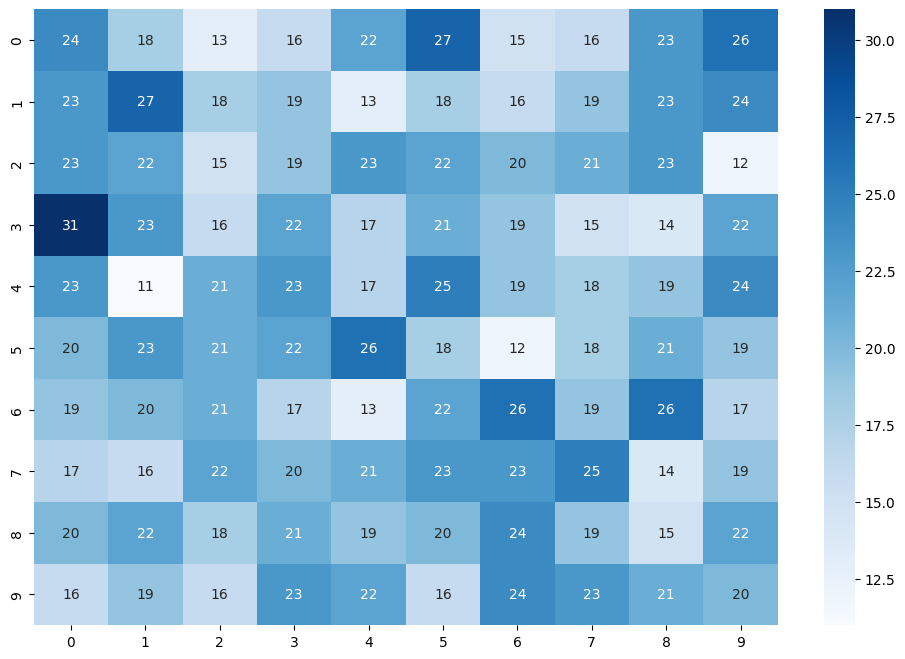

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12,8))
sns.heatmap(cm,cmap="Blues", annot=True)
plt.show()

In [25]:
from sklearn.metrics import classification_report
clr = classification_report(ytrue, ypred, target_names=list(val.class_indices.keys()), digits= 4) # create classification report
print("Classification Report:\n----------------------\n", clr)

Classification Report:
----------------------
                                                precision    recall  f1-score   support

                      Tomato___Bacterial_spot     0.1111    0.1200    0.1154       200
                        Tomato___Early_blight     0.1343    0.1350    0.1347       200
                         Tomato___Late_blight     0.0829    0.0750    0.0787       200
                           Tomato___Leaf_Mold     0.1089    0.1100    0.1095       200
                  Tomato___Septoria_leaf_spot     0.0881    0.0850    0.0865       200
Tomato___Spider_mites Two-spotted_spider_mite     0.0849    0.0900    0.0874       200
                         Tomato___Target_Spot     0.1313    0.1300    0.1307       200
       Tomato___Tomato_Yellow_Leaf_Curl_Virus     0.1295    0.1250    0.1272       200
                 Tomato___Tomato_mosaic_virus     0.0754    0.0750    0.0752       200
                             Tomato___healthy     0.0976    0.1000    0.0988      

In [26]:
model50.evaluate_generator(test)

<ipython-input-26-334ef3eb3855>:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  model50.evaluate_generator(test)


[0.45717552304267883, 0.9190000295639038]

In [36]:
model12.evaluate_generator(test)

<ipython-input-36-5083ab3df25f>:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  model12.evaluate_generator(test)


[1.3046839237213135, 0.6880000233650208]